In [1]:
import pandas as pd
import numpy as np

In [2]:
train_df = pd.read_csv("/Users/priyanshu.tuli/Desktop/machinehack/backpack_prediction/playground-series-s5e2/train.csv")

In [3]:
train_df.head()

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056
2,2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320
3,3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793
4,4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312


In [4]:
train_df.drop(columns=['id'], inplace=True)

In [5]:
train_df.shape

(300000, 10)

In [6]:
test_df = pd.read_csv("/Users/priyanshu.tuli/Desktop/machinehack/backpack_prediction/playground-series-s5e2/test.csv")

In [7]:
test_df.shape

(200000, 10)

In [8]:
test_df.head()

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg)
0,300000,Puma,Leather,Small,2.0,No,No,Tote,Green,20.671147
1,300001,Nike,Canvas,Medium,7.0,No,Yes,Backpack,Green,13.564105
2,300002,Adidas,Canvas,Large,9.0,No,Yes,Messenger,Blue,11.809799
3,300003,Adidas,Nylon,Large,1.0,Yes,No,Messenger,Green,18.477036
4,300004,NaN,Nylon,Large,2.0,Yes,Yes,Tote,Black,9.907953


In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Brand                 290295 non-null  object 
 1   Material              291653 non-null  object 
 2   Size                  293405 non-null  object 
 3   Compartments          300000 non-null  float64
 4   Laptop Compartment    292556 non-null  object 
 5   Waterproof            292950 non-null  object 
 6   Style                 292030 non-null  object 
 7   Color                 290050 non-null  object 
 8   Weight Capacity (kg)  299862 non-null  float64
 9   Price                 300000 non-null  float64
dtypes: float64(3), object(7)
memory usage: 22.9+ MB


In [10]:
train_df['Brand'].value_counts(normalize=True)

Brand
Adidas          0.206952
Under Armour    0.206659
Nike            0.197509
Puma            0.195711
Jansport        0.193169
Name: proportion, dtype: float64

In [11]:
train_df['Material'].value_counts(normalize=True)

Material
Polyester    0.273030
Leather      0.251724
Nylon        0.242079
Canvas       0.233167
Name: proportion, dtype: float64

In [12]:
train_df['Size'].value_counts(normalize=True)

Size
Medium    0.347322
Large     0.336201
Small     0.316477
Name: proportion, dtype: float64

In [13]:
train_df['Laptop Compartment'].value_counts(normalize=True)

Laptop Compartment
Yes    0.507055
No     0.492945
Name: proportion, dtype: float64

In [14]:
train_df["Laptop Compartment"] = train_df["Laptop Compartment"].map({"Yes": 1, "No": 0})

In [15]:
test_df["Laptop Compartment"] = test_df["Laptop Compartment"].map({"Yes": 1, "No": 0})

In [16]:
train_df['Waterproof'].value_counts(normalize=True)

Waterproof
Yes    0.505469
No     0.494531
Name: proportion, dtype: float64

In [17]:
train_df["Waterproof"] = train_df["Waterproof"].map({"Yes": 1, "No": 0})

In [18]:
test_df["Waterproof"] = test_df["Waterproof"].map({"Yes": 1, "No": 0})

In [19]:
train_df['Style'].value_counts(normalize=True)

Style
Messenger    0.342537
Tote         0.333658
Backpack     0.323806
Name: proportion, dtype: float64

In [20]:
train_df['Color'].value_counts(normalize=True)

Color
Pink     0.178211
Gray     0.173349
Blue     0.165823
Red      0.162796
Green    0.159924
Black    0.159897
Name: proportion, dtype: float64

In [21]:
train_df.head()

,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,Jansport,Leather,Medium,7.0,1.0,0.0,Tote,Black,11.611723,112.15875
1,Jansport,Canvas,Small,10.0,1.0,1.0,Messenger,Green,27.078537,68.88056
2,Under Armour,Leather,Small,2.0,1.0,0.0,Messenger,Red,16.643760,39.17320
3,Nike,Nylon,Small,8.0,1.0,0.0,Messenger,Green,12.937220,80.60793
4,Adidas,Canvas,Medium,1.0,1.0,1.0,Messenger,Green,17.749338,86.02312


In [22]:
train_df.groupby("Brand")["Material"].value_counts(normalize=True)

Brand         Material 
Adidas        Polyester    0.275623
              Leather      0.251712
              Nylon        0.237231
              Canvas       0.235434
Jansport      Polyester    0.268851
              Leather      0.253851
              Nylon        0.246883
              Canvas       0.230415
Nike          Polyester    0.269614
              Leather      0.256415
              Nylon        0.237174
              Canvas       0.236797
Puma          Polyester    0.278643
              Leather      0.247131
              Nylon        0.245303
              Canvas       0.228923
Under Armour  Polyester    0.272319
              Leather      0.249601
              Nylon        0.244132
              Canvas       0.233948
Name: proportion, dtype: float64

In [23]:
train_df.groupby(["Brand", "Material"])["Size"].value_counts(normalize=True)

Brand         Material   Size  
Adidas        Canvas     Large     0.338137
                         Medium    0.335314
                         Small     0.326549
              Leather    Medium    0.354184
                         Large     0.332847
                         Small     0.312969
              Nylon      Medium    0.349415
                         Large     0.334764
                         Small     0.315821
              Polyester  Medium    0.363607
                         Large     0.327418
                         Small     0.308974
Jansport      Canvas     Medium    0.344253
                         Large     0.341570
                         Small     0.314177
              Leather    Medium    0.346389
                         Large     0.339308
                         Small     0.314303
              Nylon      Medium    0.355713
                         Large     0.333714
                         Small     0.310573
              Polyester  Medium    0.351688


In [24]:
train_df.groupby(["Brand", "Material"])["Style"].value_counts(normalize=True)

Brand         Material   Style    
Adidas        Canvas     Messenger    0.343635
                         Tote         0.331438
                         Backpack     0.324927
              Leather    Messenger    0.349091
                         Tote         0.332034
                         Backpack     0.318875
              Nylon      Messenger    0.342485
                         Tote         0.337675
                         Backpack     0.319840
              Polyester  Messenger    0.348948
                         Tote         0.325876
                         Backpack     0.325175
Jansport      Canvas     Messenger    0.340365
                         Backpack     0.332843
                         Tote         0.326793
              Leather    Tote         0.343312
                         Messenger    0.335754
                         Backpack     0.320934
              Nylon      Tote         0.342155
                         Messenger    0.334147
                         

In [25]:
train_df.describe()

,Compartments,Laptop Compartment,Waterproof,Weight Capacity (kg),Price
count,300000.000000,292556.000000,292950.000000,299862.000000,300000.000000
mean,5.443590,0.507055,0.505469,18.029994,81.411107
std,2.890766,0.499951,0.499971,6.966914,39.039340
min,1.000000,0.000000,0.000000,5.000000,15.000000
25%,3.000000,0.000000,0.000000,12.097867,47.384620
50%,5.000000,1.000000,1.000000,18.068614,80.956120
75%,8.000000,1.000000,1.000000,24.002375,115.018160
max,10.000000,1.000000,1.000000,30.000000,150.000000


In [26]:
compartments_quantile = np.quantile(train_df['Compartments'], [0.25, 0.5, 0.75])

In [27]:
compartments_quantile

array([3., 5., 8.])

In [28]:
train_df['Compartments_Category'] = pd.cut(train_df['Compartments'], bins=[0, compartments_quantile[0], compartments_quantile[1], compartments_quantile[2], np.inf], labels=['Low', 'Medium', 'High', 'Very High'])

In [29]:
test_df["Compartments_Category"] = pd.cut(test_df['Compartments'], bins=[0, compartments_quantile[0], compartments_quantile[1], compartments_quantile[2], np.inf], labels=['Low', 'Medium', 'High', 'Very High'])

In [30]:
train_df["Compartments_Category_Encoded"] = train_df["Compartments_Category"].map({"Low": 0, "Medium": 1, "High": 2, "Very High": 3})
test_df["Compartments_Category_Encoded"] = test_df["Compartments_Category"].map({"Low": 0, "Medium": 1, "High": 2, "Very High": 3})

In [31]:
train_df.isna().mean()[train_df.isna().mean() > 0] * 100

Brand                   3.235000
Material                2.782333
Size                    2.198333
Laptop Compartment      2.481333
Waterproof              2.350000
Style                   2.656667
Color                   3.316667
Weight Capacity (kg)    0.046000
dtype: float64

## Imputation

In [32]:
from sklearn.impute import SimpleImputer

In [33]:
imputer = SimpleImputer(strategy='most_frequent')

In [34]:
train_df[['Brand', 'Material', 'Size', 'Style', 'Color']] = imputer.fit_transform(train_df[['Brand', 'Material', 'Size', 'Style', 'Color']])

In [35]:
test_df[['Brand', 'Material', 'Size', 'Style', 'Color']] = imputer.transform(test_df[['Brand', 'Material', 'Size', 'Style', 'Color']])

In [36]:
imputer = SimpleImputer(strategy='most_frequent')

In [37]:
train_df[['Laptop Compartment', 'Waterproof']] = imputer.fit_transform(train_df[['Laptop Compartment', 'Waterproof']])

In [38]:
test_df[['Laptop Compartment', 'Waterproof']] = imputer.transform(test_df[['Laptop Compartment', 'Waterproof']])

In [39]:
imputer = SimpleImputer(strategy='median')

In [40]:
train_df["Weight Capacity (kg)"] = imputer.fit_transform(train_df[["Weight Capacity (kg)"]])

In [41]:
test_df["Weight Capacity (kg)"] = imputer.transform(test_df[["Weight Capacity (kg)"]])

## Target Encoding

In [42]:
train_df['mean_price_per_brand'] = train_df.groupby('Brand')['Price'].transform('mean')
train_df['median_price_per_brand'] = train_df.groupby('Brand')['Price'].transform('median')
train_df['max_price_per_brand'] = train_df.groupby('Brand')['Price'].transform('max')
train_df['min_price_per_brand'] = train_df.groupby('Brand')['Price'].transform('min')

In [43]:
train_df['mean_price_per_brand_material'] = train_df.groupby(['Brand', 'Material'])['Price'].transform('mean')
train_df['median_price_per_brand_material'] = train_df.groupby(['Brand', 'Material'])['Price'].transform('median')
train_df['max_price_per_brand_material'] = train_df.groupby(['Brand', 'Material'])['Price'].transform('max')
train_df['min_price_per_brand_material'] = train_df.groupby(['Brand', 'Material'])['Price'].transform('min')

In [44]:
train_df['mean_price_per_brand_material_size'] = train_df.groupby(['Brand', 'Material', 'Size'])['Price'].transform('mean')
train_df['median_price_per_brand_material_size'] = train_df.groupby(['Brand', 'Material', 'Size'])['Price'].transform('median')
train_df['max_price_per_brand_material_size'] = train_df.groupby(['Brand', 'Material', 'Size'])['Price'].transform('max')
train_df['min_price_per_brand_material_size'] = train_df.groupby(['Brand', 'Material', 'Size'])['Price'].transform('min')

In [45]:
train_df['mean_price_per_brand_material_style'] = train_df.groupby(['Brand', 'Material', 'Style'])['Price'].transform('mean')
train_df['median_price_per_brand_material_style'] = train_df.groupby(['Brand', 'Material', 'Style'])['Price'].transform('median')
train_df['max_price_per_brand_material_style'] = train_df.groupby(['Brand', 'Material', 'Style'])['Price'].transform('max')
train_df['min_price_per_brand_material_style'] = train_df.groupby(['Brand', 'Material', 'Style'])['Price'].transform('min')

In [46]:
train_df['mean_price_per_brand_material_color'] = train_df.groupby(['Brand', 'Material', 'Color'])['Price'].transform('mean')
train_df['median_price_per_brand_material_color'] = train_df.groupby(['Brand', 'Material', 'Color'])['Price'].transform('median')
train_df['max_price_per_brand_material_color'] = train_df.groupby(['Brand', 'Material', 'Color'])['Price'].transform('max')
train_df['min_price_per_brand_material_color'] = train_df.groupby(['Brand', 'Material', 'Color'])['Price'].transform('min')

In [47]:
train_df['mean_price_per_brand_material_size_style'] = train_df.groupby(['Brand', 'Material', 'Size', 'Style'])['Price'].transform('mean')
train_df['median_price_per_brand_material_size_style'] = train_df.groupby(['Brand', 'Material', 'Size', 'Style'])['Price'].transform('median')
train_df['max_price_per_brand_material_size_style'] = train_df.groupby(['Brand', 'Material', 'Size', 'Style'])['Price'].transform('max')
train_df['min_price_per_brand_material_size_style'] = train_df.groupby(['Brand', 'Material', 'Size', 'Style'])['Price'].transform('min')

In [48]:
train_df['mean_price_per_brand_material_size_color'] = train_df.groupby(['Brand', 'Material', 'Size', 'Color'])['Price'].transform('mean')
train_df['median_price_per_brand_material_size_color'] = train_df.groupby(['Brand', 'Material', 'Size', 'Color'])['Price'].transform('median')
train_df['max_price_per_brand_material_size_color'] = train_df.groupby(['Brand', 'Material', 'Size', 'Color'])['Price'].transform('max')
train_df['min_price_per_brand_material_size_color'] = train_df.groupby(['Brand', 'Material', 'Size', 'Color'])['Price'].transform('min')

In [49]:
train_df['mean_price_per_brand_material_size_style_color'] = train_df.groupby(['Brand', 'Material', 'Size', 'Style', 'Color'])['Price'].transform('mean')
train_df['median_price_per_brand_material_size_style_color'] = train_df.groupby(['Brand', 'Material', 'Size', 'Style', 'Color'])['Price'].transform('median')
train_df['max_price_per_brand_material_size_style_color'] = train_df.groupby(['Brand', 'Material', 'Size', 'Style', 'Color'])['Price'].transform('max')
train_df['min_price_per_brand_material_size_style_color'] = train_df.groupby(['Brand', 'Material', 'Size', 'Style', 'Color'])['Price'].transform('min')

In [50]:
for i, group in test_df.groupby("Brand"):
    test_df.loc[group.index, 'mean_price_per_brand'] = train_df[train_df['Brand'] == i]['Price'].mean()
    test_df.loc[group.index, 'median_price_per_brand'] = train_df[train_df['Brand'] == i]['Price'].median()
    test_df.loc[group.index, 'max_price_per_brand'] = train_df[train_df['Brand'] == i]['Price'].max()
    test_df.loc[group.index, 'min_price_per_brand'] = train_df[train_df['Brand'] == i]['Price'].min()

In [51]:
for i, group in test_df.groupby(["Brand", "Material"]):
    test_df.loc[group.index, 'mean_price_per_brand_material'] = train_df[(train_df['Brand'] == i[0]) & (train_df['Material'] == i[1])]['Price'].mean()
    test_df.loc[group.index, 'median_price_per_brand_material'] = train_df[(train_df['Brand'] == i[0]) & (train_df['Material'] == i[1])]['Price'].median()
    test_df.loc[group.index, 'max_price_per_brand_material'] = train_df[(train_df['Brand'] == i[0]) & (train_df['Material'] == i[1])]['Price'].max()
    test_df.loc[group.index, 'min_price_per_brand_material'] = train_df[(train_df['Brand'] == i[0]) & (train_df['Material'] == i[1])]['Price'].min()

In [52]:
for i, group in test_df.groupby(["Brand", "Material", "Size"]):
    test_df.loc[group.index, 'mean_price_per_brand_material_size'] = train_df[(train_df['Brand'] == i[0]) & (train_df['Material'] == i[1]) & (train_df['Size'] == i[2])]['Price'].mean()
    test_df.loc[group.index, 'median_price_per_brand_material_size'] = train_df[(train_df['Brand'] == i[0]) & (train_df['Material'] == i[1]) & (train_df['Size'] == i[2])]['Price'].median()
    test_df.loc[group.index, 'max_price_per_brand_material_size'] = train_df[(train_df['Brand'] == i[0]) & (train_df['Material'] == i[1]) & (train_df['Size'] == i[2])]['Price'].max()
    test_df.loc[group.index, 'min_price_per_brand_material_size'] = train_df[(train_df['Brand'] == i[0]) & (train_df['Material'] == i[1]) & (train_df['Size'] == i[2])]['Price'].min()

In [53]:
for i, group in test_df.groupby(["Brand", "Material", "Style"]):
    test_df.loc[group.index, 'mean_price_per_brand_material_style'] = train_df[(train_df['Brand'] == i[0]) & (train_df['Material'] == i[1]) & (train_df['Style'] == i[2])]['Price'].mean()
    test_df.loc[group.index, 'median_price_per_brand_material_style'] = train_df[(train_df['Brand'] == i[0]) & (train_df['Material'] == i[1]) & (train_df['Style'] == i[2])]['Price'].median()
    test_df.loc[group.index, 'max_price_per_brand_material_style'] = train_df[(train_df['Brand'] == i[0]) & (train_df['Material'] == i[1]) & (train_df['Style'] == i[2])]['Price'].max()
    test_df.loc[group.index, 'min_price_per_brand_material_style'] = train_df[(train_df['Brand'] == i[0]) & (train_df['Material'] == i[1]) & (train_df['Style'] == i[2])]['Price'].min()

In [54]:
for i, group in test_df.groupby(["Brand", "Material", "Color"]):
    test_df.loc[group.index, 'mean_price_per_brand_material_color'] = train_df[(train_df['Brand'] == i[0]) & (train_df['Material'] == i[1]) & (train_df['Color'] == i[2])]['Price'].mean()
    test_df.loc[group.index, 'median_price_per_brand_material_color'] = train_df[(train_df['Brand'] == i[0]) & (train_df['Material'] == i[1]) & (train_df['Color'] == i[2])]['Price'].median()
    test_df.loc[group.index, 'max_price_per_brand_material_color'] = train_df[(train_df['Brand'] == i[0]) & (train_df['Material'] == i[1]) & (train_df['Color'] == i[2])]['Price'].max()
    test_df.loc[group.index, 'min_price_per_brand_material_color'] = train_df[(train_df['Brand'] == i[0]) & (train_df['Material'] == i[1]) & (train_df['Color'] == i[2])]['Price'].min()

In [55]:
for i, group in test_df.groupby(["Brand", "Material", "Size", "Style"]):
    test_df.loc[group.index, 'mean_price_per_brand_material_size_style'] = train_df[(train_df['Brand'] == i[0]) & (train_df['Material'] == i[1]) & (train_df['Size'] == i[2]) & (train_df['Style'] == i[3])]['Price'].mean()
    test_df.loc[group.index, 'median_price_per_brand_material_size_style'] = train_df[(train_df['Brand'] == i[0]) & (train_df['Material'] == i[1]) & (train_df['Size'] == i[2]) & (train_df['Style'] == i[3])]['Price'].median()
    test_df.loc[group.index, 'max_price_per_brand_material_size_style'] = train_df[(train_df['Brand'] == i[0]) & (train_df['Material'] == i[1]) & (train_df['Size'] == i[2]) & (train_df['Style'] == i[3])]['Price'].max()
    test_df.loc[group.index, 'min_price_per_brand_material_size_style'] = train_df[(train_df['Brand'] == i[0]) & (train_df['Material'] == i[1]) & (train_df['Size'] == i[2]) & (train_df['Style'] == i[3])]['Price'].min()

In [56]:
for i, group in test_df.groupby(["Brand", "Material", "Size", "Color"]):
    test_df.loc[group.index, 'mean_price_per_brand_material_size_color'] = train_df[(train_df['Brand'] == i[0]) & (train_df['Material'] == i[1]) & (train_df['Size'] == i[2]) & (train_df['Color'] == i[3])]['Price'].mean()
    test_df.loc[group.index, 'median_price_per_brand_material_size_color'] = train_df[(train_df['Brand'] == i[0]) & (train_df['Material'] == i[1]) & (train_df['Size'] == i[2]) & (train_df['Color'] == i[3])]['Price'].median()
    test_df.loc[group.index, 'max_price_per_brand_material_size_color'] = train_df[(train_df['Brand'] == i[0]) & (train_df['Material'] == i[1]) & (train_df['Size'] == i[2]) & (train_df['Color'] == i[3])]['Price'].max()
    test_df.loc[group.index, 'min_price_per_brand_material_size_color'] = train_df[(train_df['Brand'] == i[0]) & (train_df['Material'] == i[1]) & (train_df['Size'] == i[2]) & (train_df['Color'] == i[3])]['Price'].min()

In [57]:
for i, group in test_df.groupby(["Brand", "Material", "Size", "Style", "Color"]):
    test_df.loc[group.index, 'mean_price_per_brand_material_size_style_color'] = train_df[(train_df['Brand'] == i[0]) & (train_df['Material'] == i[1]) & (train_df['Size'] == i[2]) & (train_df['Style'] == i[3]) & (train_df['Color'] == i[4])]['Price'].mean()
    test_df.loc[group.index, 'median_price_per_brand_material_size_style_color'] = train_df[(train_df['Brand'] == i[0]) & (train_df['Material'] == i[1]) & (train_df['Size'] == i[2]) & (train_df['Style'] == i[3]) & (train_df['Color'] == i[4])]['Price'].median()
    test_df.loc[group.index, 'max_price_per_brand_material_size_style_color'] = train_df[(train_df['Brand'] == i[0]) & (train_df['Material'] == i[1]) & (train_df['Size'] == i[2]) & (train_df['Style'] == i[3]) & (train_df['Color'] == i[4])]['Price'].max()
    test_df.loc[group.index, 'min_price_per_brand_material_size_style_color'] = train_df[(train_df['Brand'] == i[0]) & (train_df['Material'] == i[1]) & (train_df['Size'] == i[2]) & (train_df['Style'] == i[3]) & (train_df['Color'] == i[4])]['Price'].min()

In [58]:
set(train_df.columns) - set(test_df.columns)

{'Price'}

In [59]:
set(test_df.columns) - set(train_df.columns)

{'id'}

## Feature Engineering

In [60]:
train_df['Size'].value_counts()

Size
Medium    108501
Large      98643
Small      92856
Name: count, dtype: int64

In [61]:
train_df["Size_Encoded"] = train_df["Size"].map({"Small": 0, "Medium": 1, "Large": 2})

In [62]:
test_df["Size_Encoded"] = test_df["Size"].map({"Small": 0, "Medium": 1, "Large": 2})

In [63]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [64]:
train_df.head()

,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price,Compartments_Category,Compartments_Category_Encoded,mean_price_per_brand,median_price_per_brand,max_price_per_brand,min_price_per_brand,mean_price_per_brand_material,median_price_per_brand_material,max_price_per_brand_material,min_price_per_brand_material,mean_price_per_brand_material_size,median_price_per_brand_material_size,max_price_per_brand_material_size,min_price_per_brand_material_size,mean_price_per_brand_material_style,median_price_per_brand_material_style,max_price_per_brand_material_style,min_price_per_brand_material_style,mean_price_per_brand_material_color,median_price_per_brand_material_color,max_price_per_brand_material_color,min_price_per_brand_material_color,mean_price_per_brand_material_size_style,median_price_per_brand_material_size_style,max_price_per_brand_material_size_style,min_price_per_brand_material_size_style,mean_price_per_brand_material_size_color,median_price_per_brand_material_size_color,max_price_per_brand_material_size_color,min_price_per_brand_material_size_color,mean_price_per_brand_material_size_style_color,median_price_per_brand_material_size_style_color,max_price_per_brand_material_size_style_color,min_price_per_brand_material_size_style_color,Size_Encoded
0,Jansport,Leather,Medium,7.0,1.0,0.0,Tote,Black,11.611723,112.15875,High,2,81.791276,81.470390,150.0,15.0,80.760899,79.25729,150.0,15.0,80.508231,78.919590,150.0,15.0,80.256659,77.892310,150.0,15.0,79.648705,77.91799,150.0,15.0,80.229268,77.509875,150.0,15.0,79.594252,78.46470,150.0,15.0,79.971937,78.380940,150.0,15.0,1
1,Jansport,Canvas,Small,10.0,1.0,1.0,Messenger,Green,27.078537,68.88056,Very High,3,81.791276,81.470390,150.0,15.0,82.142295,82.44770,150.0,15.0,82.543625,82.368110,150.0,15.0,81.987687,81.852370,150.0,15.0,82.990856,84.20471,150.0,15.0,83.202654,83.779540,150.0,15.0,83.321421,82.72579,150.0,15.0,81.136131,85.555880,150.0,15.0,0
2,Under Armour,Leather,Small,2.0,1.0,0.0,Messenger,Red,16.643760,39.17320,Low,0,81.976311,81.995740,150.0,15.0,80.929651,80.12535,150.0,15.0,81.627235,81.396370,150.0,15.0,80.890879,80.331430,150.0,15.0,81.407565,82.09073,150.0,15.0,81.060358,80.849190,150.0,15.0,81.454331,82.83871,150.0,15.0,78.750737,77.592770,150.0,15.0,0
3,Nike,Nylon,Small,8.0,1.0,0.0,Messenger,Green,12.937220,80.60793,High,2,81.319209,80.679460,150.0,15.0,80.767257,79.85674,150.0,15.0,80.925431,80.283385,150.0,15.0,80.799835,80.169720,150.0,15.0,80.956354,79.92098,150.0,15.0,80.860397,80.580005,150.0,15.0,80.138913,80.60793,150.0,15.0,79.681330,80.354660,150.0,15.0,0
4,Adidas,Canvas,Medium,1.0,1.0,1.0,Messenger,Green,17.749338,86.02312,Low,0,80.664673,80.072885,150.0,15.0,81.521295,81.51055,150.0,15.0,80.693812,80.314030,150.0,15.0,81.684334,81.175365,150.0,15.0,80.759406,79.29203,150.0,15.0,80.122692,79.674710,150.0,15.0,79.483567,79.80572,150.0,15.0,79.744874,79.864005,150.0,15.0,1


In [65]:
from sklearn.cluster import KMeans

In [66]:
selected_train_df = train_df[['Brand', "Material", "Size_Encoded", "Style", "Color", "Compartments", "Weight Capacity (kg)", "Laptop Compartment", "Waterproof"]]

In [67]:
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

In [68]:
ordinal_encoder = OrdinalEncoder()

In [69]:
selected_train_df[['Brand', "Material", "Style", "Color"]] = ordinal_encoder.fit_transform(selected_train_df[['Brand', "Material", "Style", "Color"]])

/var/folders/pw/wmjkx07d5bj7gwx0bm5zkdjm0000gp/T/ipykernel_56403/2891481127.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_train_df[['Brand', "Material", "Style", "Color"]] = ordinal_encoder.fit_transform(selected_train_df[['Brand', "Material", "Style", "Color"]])


In [70]:
scaler = StandardScaler()

In [71]:
scaled_selected_train_df = scaler.fit_transform(selected_train_df)

In [72]:
model = KMeans(n_clusters=10, random_state=42)

In [73]:
model.fit(scaled_selected_train_df)

KMeans(n_clusters=10, random_state=42)

In [74]:
selected_test_df = test_df[['Brand', "Material", "Size_Encoded", "Style", "Color", "Compartments", "Weight Capacity (kg)", "Laptop Compartment", "Waterproof"]]

In [75]:
selected_test_df[['Brand', "Material", "Style", "Color"]] = ordinal_encoder.transform(selected_test_df[['Brand', "Material", "Style", "Color"]])

/var/folders/pw/wmjkx07d5bj7gwx0bm5zkdjm0000gp/T/ipykernel_56403/911279021.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_test_df[['Brand', "Material", "Style", "Color"]] = ordinal_encoder.transform(selected_test_df[['Brand', "Material", "Style", "Color"]])


In [76]:
scaled_selected_test_df = scaler.transform(selected_test_df)

In [77]:
test_df["Cluster"] = model.predict(scaled_selected_test_df)

In [78]:
train_df['Cluster'] = model.predict(scaled_selected_train_df)

In [79]:
import seaborn as sns

In [80]:
import matplotlib.pyplot as plt

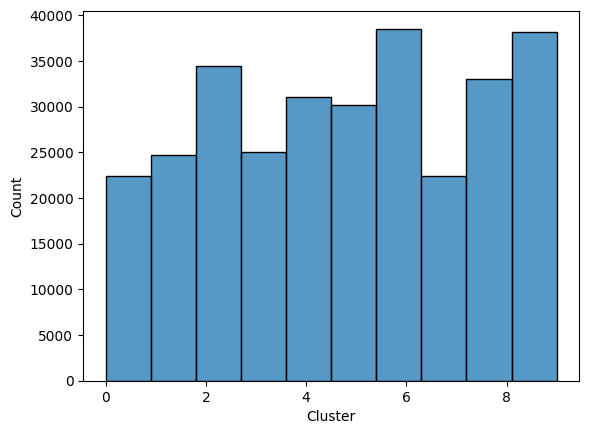

In [81]:
sns.histplot(train_df['Cluster'], bins=10)
plt.show()

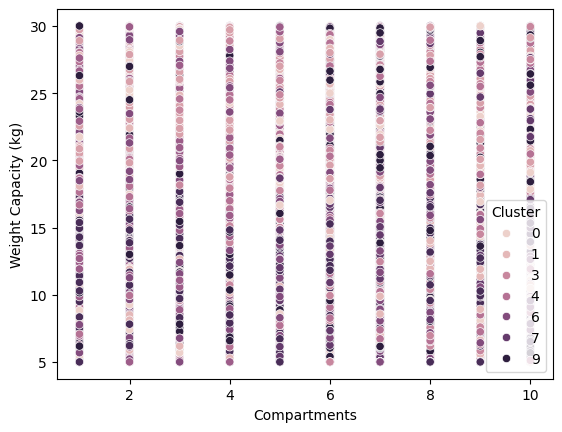

In [82]:
sns.scatterplot(x=train_df['Compartments'], y=train_df['Weight Capacity (kg)'], hue=train_df['Cluster'])
plt.show()

In [83]:
train_df['cluster_mean_price'] = train_df.groupby('Cluster')['Price'].transform('mean')
train_df['cluster_median_price'] = train_df.groupby('Cluster')['Price'].transform('median')
train_df['cluster_max_price'] = train_df.groupby('Cluster')['Price'].transform('max')
train_df['cluster_min_price'] = train_df.groupby('Cluster')['Price'].transform('min')

In [84]:
for i, group in test_df.groupby("Cluster"):
    test_df.loc[group.index, 'cluster_mean_price'] = train_df[train_df['Cluster'] == i]['Price'].mean()
    test_df.loc[group.index, 'cluster_median_price'] = train_df[train_df['Cluster'] == i]['Price'].median()
    test_df.loc[group.index, 'cluster_max_price'] = train_df[train_df['Cluster'] == i]['Price'].max()
    test_df.loc[group.index, 'cluster_min_price'] = train_df[train_df['Cluster'] == i]['Price'].min()

In [85]:
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

In [92]:
train_df.select_dtypes(include=['object', 'category']).columns

Index(['Brand', 'Material', 'Size', 'Style', 'Color', 'Compartments_Category',
       'Compartments_Category_Encoded'],
      dtype='object')

In [94]:
train_df['Compartments_Category_Encoded'] = train_df['Compartments_Category_Encoded'].astype('int')
test_df['Compartments_Category_Encoded'] = test_df['Compartments_Category_Encoded'].astype('int')

In [126]:
train_df['Brand_Encoded'] = train_df['Brand'].astype('category').cat.codes
test_df['Brand_Encoded'] = test_df['Brand'].astype('category').cat.codes

In [127]:
train_df['Material_Encoded'] = train_df['Material'].astype('category').cat.codes
test_df['Material_Encoded'] = test_df['Material'].astype('category').cat.codes

In [128]:
train_df['Style_Encoded'] = train_df['Style'].astype('category').cat.codes
test_df['Style_Encoded'] = test_df['Style'].astype('category').cat.codes

In [129]:
train_df['Color_Encoded'] = train_df['Color'].astype('category').cat.codes
test_df['Color_Encoded'] = test_df['Color'].astype('category').cat.codes

In [131]:
X_train, X_valid, y_train, y_valid = train_test_split(train_df.drop(columns=['Price', 'Brand', 'Material', 'Size', 'Style', 'Color', 'Compartments_Category']), train_df['Price'], test_size=0.2, random_state=42)

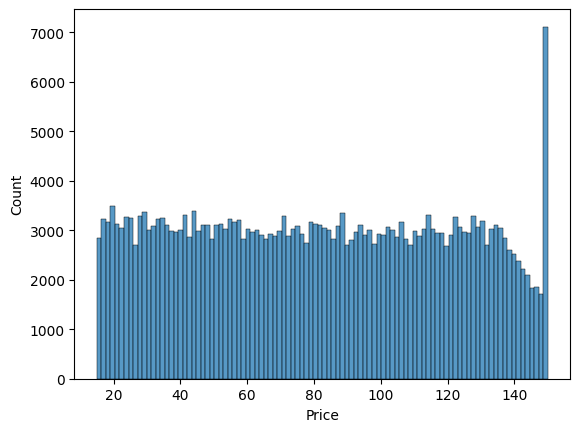

In [132]:
sns.histplot(train_df['Price'], bins=100)
plt.show()

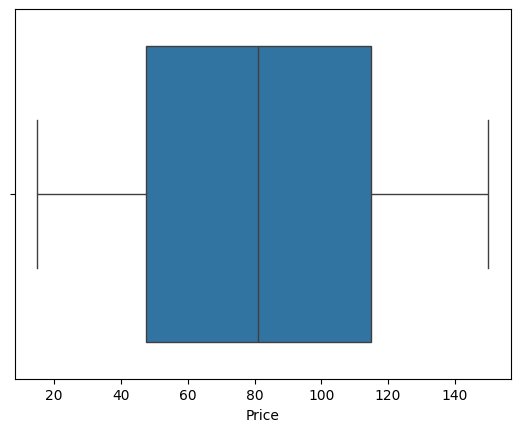

In [133]:
sns.boxplot(train_df['Price'], orient='h')
plt.show()

In [134]:
import xgboost as xgb

In [144]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_valid = scaler.transform(X_valid)

In [146]:
scaled_test = scaler.transform(test_df.drop(columns=['Brand', 'Material', 'Size', 'Style', 'Color', 'Compartments_Category', 'Price', "id"]))

In [184]:
import lightgbm as lgb

In [214]:
import catboost as cb

In [221]:
rf_regressor = RandomForestRegressor(n_estimators=200, random_state=42, max_depth=5, n_jobs=-1, min_samples_split=10, verbose=1, max_features='sqrt', criterion='friedman_mse',
                                     bootstrap=True, min_samples_leaf=10, ccp_alpha=0.05)
xgb_regressor = GradientBoostingRegressor(n_estimators=200, random_state=42, max_depth=5, min_samples_split=10, verbose=1, max_features='sqrt', criterion='friedman_mse',
                                          min_samples_leaf=10)
lgb_regressor = lgb.LGBMRegressor(n_estimators=200, random_state=42, max_depth=5, min_samples_split=10, verbose=1,
                                  min_samples_leaf=10, learning_rate=0.05, boosting_type='gbdt', reg_alpha=0.5, reg_lambda=1.0, subsample=0.8, colsample_bytree=0.6,
                                  objective='regression', metric='rmse'
                                  )
cb_regressor = cb.CatBoostRegressor(n_estimators=200, random_state=42, max_depth=5, verbose=1, loss_function='RMSE', learning_rate=0.05, 
                                    reg_lambda=1.0, subsample=0.8, colsample_bylevel=0.6)
ridge_regressor = Ridge(alpha=1.0, random_state=42)

# Define Voting Regressor
voting_regressor = VotingRegressor(estimators=[
    ('rf', rf_regressor),
    ('xgb', xgb_regressor),
    ('lgb', lgb_regressor),
    ('cb', cb_regressor),
    ('ridge', ridge_regressor)
])

In [222]:
voting_regressor.fit(scaled_X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 180 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.3s finished


      Iter       Train Loss   Remaining Time 
         1        1524.9293           20.05s
         2        1524.0122           39.06s
         3        1523.2996           35.82s
         4        1522.7271           32.06s
         5        1521.9601           31.05s
         6        1521.4773           28.93s
         7        1521.0529           27.68s
         8        1520.6680           26.58s
         9        1520.3352           25.99s
        10        1519.9245           25.52s
        20        1517.3385           21.78s
        30        1515.8901           20.74s
        40        1514.6464           19.17s
        50        1513.6426           18.66s
        60        1512.7650           17.04s
        70        1511.9586           15.57s
        80        1510.8970           14.62s
        90        1509.9681           13.44s
       100        1509.1709           12.07s
       200        1500.8924            0.00s
[LightGBM] [Warning] Unknown parameter: min_samples_sp

VotingRegressor(estimators=[('rf',
                             RandomForestRegressor(ccp_alpha=0.05,
                                                   criterion='friedman_mse',
                                                   max_depth=5,
                                                   max_features='sqrt',
                                                   min_samples_leaf=10,
                                                   min_samples_split=10,
                                                   n_estimators=200, n_jobs=-1,
                                                   random_state=42,
                                                   verbose=1)),
                            ('xgb',
                             GradientBoostingRegressor(max_depth=5,
                                                       max_features='sqrt',
                                                       min_samples_leaf=10,
                                                       min_samples_split=10,
                                                       n_estimators=200,
                                                       ran...e=42,
                                                       verbose=1)),
                            ('lgb',
                             LGBMRegressor(colsample_bytree=0.6,
                                           learning_rate=0.05, max_depth=5,
                                           metric='rmse', min_samples_leaf=10,
                                           min_samples_split=10,
                                           n_estimators=200,
                                           objective='regression',
                                           random_state=42, reg_alpha=0.5,
                                           reg_lambda=1.0, subsample=0.8,
                                           verbose=1)),
                            ('cb',
                             <catboost.core.CatBoostRegressor object at 0x4a9ce0550>),
                            ('ridge', Ridge(random_state=42))])

In [223]:
from sklearn.metrics import mean_squared_error

In [224]:
x_train_preds = voting_regressor.predict(scaled_X_train)
x_valid_preds = voting_regressor.predict(scaled_X_valid)

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.3s
[Parallel(n_jobs=10)]: Done 200 out of 200 | elapsed:    0.3s finished


[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=10. Current value: min_data_in_leaf=10


[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.2s
[Parallel(n_jobs=10)]: Done 200 out of 200 | elapsed:    0.2s finished


[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=10. Current value: min_data_in_leaf=10


In [225]:
mean_squared_error(y_train, x_train_preds, squared=False), mean_squared_error(y_valid, x_valid_preds, squared=False)

/Users/priyanshu.tuli/Desktop/machinehack/.venv/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/priyanshu.tuli/Desktop/machinehack/.venv/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(38.867844221543756, 38.86747126562576)

In [226]:
scaled_train_df = scaler.fit_transform(train_df.drop(columns=['Price', 'Brand', 'Material', 'Size', 'Style', 'Color', 'Compartments_Category']))
scaled_test_df = scaler.transform(test_df.drop(columns=['Brand', 'Material', 'Size', 'Style', 'Color', 'Compartments_Category', 'Price', "id"]))

In [227]:
voting_regressor.fit(scaled_train_df, train_df['Price'])

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 180 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.2s finished


      Iter       Train Loss   Remaining Time 
         1        1522.9905           21.93s
         2        1522.0271           28.08s
         3        1521.1318           30.40s
         4        1520.6488           29.90s
         5        1519.9914           30.76s
         6        1519.6625           29.73s
         7        1519.1784           29.14s
         8        1518.6863           28.74s
         9        1518.1757           30.21s
        10        1518.0012           28.59s
        20        1515.8261           28.04s
        30        1514.5489           26.47s
        40        1513.5994           25.00s
        50        1512.7518           23.02s
        60        1511.9078           21.06s
        70        1511.2088           19.30s
        80        1510.4311           17.71s
        90        1509.6238           16.33s
       100        1508.9216           14.77s
       200        1502.1703            0.00s
[LightGBM] [Warning] Unknown parameter: min_samples_sp

VotingRegressor(estimators=[('rf',
                             RandomForestRegressor(ccp_alpha=0.05,
                                                   criterion='friedman_mse',
                                                   max_depth=5,
                                                   max_features='sqrt',
                                                   min_samples_leaf=10,
                                                   min_samples_split=10,
                                                   n_estimators=200, n_jobs=-1,
                                                   random_state=42,
                                                   verbose=1)),
                            ('xgb',
                             GradientBoostingRegressor(max_depth=5,
                                                       max_features='sqrt',
                                                       min_samples_leaf=10,
                                                       min_samples_split=10,
                                                       n_estimators=200,
                                                       ran...e=42,
                                                       verbose=1)),
                            ('lgb',
                             LGBMRegressor(colsample_bytree=0.6,
                                           learning_rate=0.05, max_depth=5,
                                           metric='rmse', min_samples_leaf=10,
                                           min_samples_split=10,
                                           n_estimators=200,
                                           objective='regression',
                                           random_state=42, reg_alpha=0.5,
                                           reg_lambda=1.0, subsample=0.8,
                                           verbose=1)),
                            ('cb',
                             <catboost.core.CatBoostRegressor object at 0x4a9ce0550>),
                            ('ridge', Ridge(random_state=42))])

In [228]:
test_df['Price'] = voting_regressor.predict(scaled_test_df)

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.2s
[Parallel(n_jobs=10)]: Done 200 out of 200 | elapsed:    0.2s finished


[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=10. Current value: min_data_in_leaf=10


In [229]:
test_df[['id', 'Price']].to_csv("submission.csv", index=False)